In [1]:
#1
import numpy as np

class ScratchSVMClassifier():
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False,
                 gamma=1, coef0=0, degree=3):
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose


        self.gamma = gamma
        self.coef0 = coef0
        self.degree = degree

    def _kernel_function(self, x1, x2):

        if self.kernel == 'linear':
            return np.dot(x1, x2.T)
        elif self.kernel == 'polynomial':
            return (self.gamma * np.dot(x1, x2.T) + self.coef0) ** self.degree
        else:
            raise ValueError(f"Unknown kernel: {self.kernel}")

In [2]:
    def _update_lagrange_multipliers(self, X, y, lam):

        m = X.shape[0]
        for i in range(m):

            kernel_values = self._kernel_function(X[i], X)
            summation = np.sum(lam * y * y[i] * kernel_values)
            lam_new = lam[i] + self.lr * (1 - summation)
            lam[i] = max(0, lam_new)
        return lam

In [3]:
    def _select_support_vectors(self, X, y, lam):

        support_vector_indices = np.where(lam > self.threshold)[0]
        self.n_support_vectors = len(support_vector_indices)
        self.index_support_vectors = support_vector_indices
        self.lam_sv = lam[support_vector_indices]
        self.X_sv = X[support_vector_indices]
        self.y_sv = y[support_vector_indices]

In [4]:
    def fit(self, X, y, X_val=None, y_val=None):
        m, n = X.shape

        lam = np.zeros(m)

        for it in range(self.iter):
            lam = self._update_lagrange_multipliers(X, y, lam)
            self._select_support_vectors(X, y, lam)

            if self.verbose and (it % 10 == 0 or it == self.iter - 1):
                print(f"Iteration {it+1}/{self.iter}, support vectors: {self.n_support_vectors}")

In [5]:
    def predict(self, X):

        m = X.shape[0]
        y_pred = np.zeros(m)

        for i in range(m):
            kernel_vals = self._kernel_function(X[i], self.X_sv)
            decision = np.sum(self.lam_sv * self.y_sv * kernel_vals)
            y_pred[i] = 1 if decision >= 0 else -1

        return y_pred.astype(int)

In [6]:
import matplotlib.pyplot as plt

class ScratchSVMClassifier():
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False,
                 gamma=1, coef0=0, degree=3):
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose

        self.gamma = gamma
        self.coef0 = coef0
        self.degree = degree

    def _kernel_function(self, x1, x2):
        if self.kernel == 'linear':
            return np.dot(x1, x2.T)
        elif self.kernel == 'polynomial':
            return (self.gamma * np.dot(x1, x2.T) + self.coef0) ** self.degree
        else:
            raise ValueError(f"Unknown kernel: {self.kernel}")

    def _update_lagrange_multipliers(self, X, y, lam):
        m = X.shape[0]
        for i in range(m):
            kernel_values = self._kernel_function(X[i], X)
            summation = np.sum(lam * y * y[i] * kernel_values)
            lam_new = lam[i] + self.lr * (1 - summation)
            lam[i] = max(0, lam_new)
        return lam

    def _select_support_vectors(self, X, y, lam):
        support_vector_indices = np.where(lam > self.threshold)[0]
        self.n_support_vectors = len(support_vector_indices)
        self.index_support_vectors = support_vector_indices
        self.lam_sv = lam[support_vector_indices]
        self.X_sv = X[support_vector_indices]
        self.y_sv = y[support_vector_indices]

    def fit(self, X, y, X_val=None, y_val=None):
        m, n = X.shape
        lam = np.zeros(m)
        for it in range(self.iter):
            lam = self._update_lagrange_multipliers(X, y, lam)
            self._select_support_vectors(X, y, lam)
            if self.verbose and (it % 10 == 0 or it == self.iter - 1):
                print(f"Iteration {it+1}/{self.iter}, support vectors: {self.n_support_vectors}")

    def predict(self, X):
        m = X.shape[0]
        y_pred = np.zeros(m)
        for i in range(m):
            kernel_vals = self._kernel_function(X[i], self.X_sv)
            decision = np.sum(self.lam_sv * self.y_sv * kernel_vals)
            y_pred[i] = 1 if decision >= 0 else -1
        return y_pred.astype(int)

    def plot_decision_boundary(self, X, y, resolution=200):
        """
        Visualize decision boundary (for 2D datasets only).
        """
        if X.shape[1] != 2:
            raise ValueError("plot_decision_boundary works only for 2D features")

        # create a grid of points
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                             np.linspace(y_min, y_max, resolution))

        grid = np.c_[xx.ravel(), yy.ravel()]
        Z = self.predict(grid)
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=40, edgecolors='k')
        plt.scatter(self.X_sv[:, 0], self.X_sv[:, 1],
                    s=100, facecolors='none', edgecolors='yellow', linewidths=1.5,
                    label="Support Vectors")
        plt.legend()
        plt.title("SVM Decision Boundary")
        plt.show()

Iteration 1/200, support vectors: 100
Iteration 11/200, support vectors: 100
Iteration 21/200, support vectors: 92
Iteration 31/200, support vectors: 87
Iteration 41/200, support vectors: 77
Iteration 51/200, support vectors: 76
Iteration 61/200, support vectors: 74
Iteration 71/200, support vectors: 69
Iteration 81/200, support vectors: 65
Iteration 91/200, support vectors: 62
Iteration 101/200, support vectors: 60
Iteration 111/200, support vectors: 58
Iteration 121/200, support vectors: 57
Iteration 131/200, support vectors: 56
Iteration 141/200, support vectors: 55
Iteration 151/200, support vectors: 50
Iteration 161/200, support vectors: 47
Iteration 171/200, support vectors: 45
Iteration 181/200, support vectors: 45
Iteration 191/200, support vectors: 45
Iteration 200/200, support vectors: 45


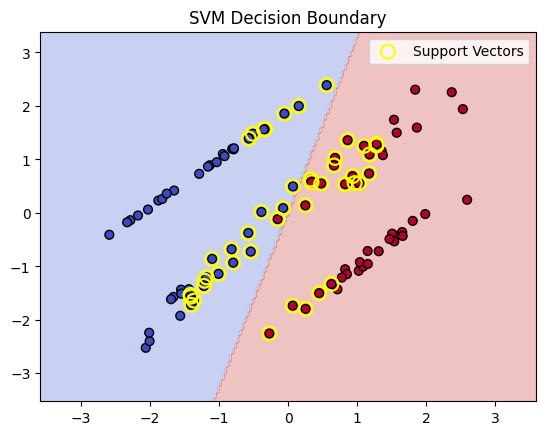

In [7]:
# Example with toy dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
                           n_informative=2, n_redundant=0, random_state=42)
y = np.where(y == 0, -1, 1)  # convert labels to -1 and +1

svm = ScratchSVMClassifier(num_iter=200, lr=0.001, verbose=True)
svm.fit(X, y)
svm.plot_decision_boundary(X, y)